In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
warnings.filterwarnings('ignore')

path=''

In [401]:
#reads the csv
stocks_spain = pd.read_excel(f'{path}data/stocks_spain.xlsx')
stocks_spain.drop(columns=stocks_spain.columns[0], axis=1, inplace=True)
stocks_spain

,Date,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
0,2018-01-02,8.710,60.220001,48.349998,11.220,32.255001,170.500000,8.348511,7.953,7.082,...,1.655001,1.660000,5.226751,2.500,8.191,9.400,4.397,1.2900,66.521370,54.700001
1,2018-01-03,8.665,60.500000,49.299999,11.230,32.470001,172.399994,8.539362,7.964,7.094,...,1.676181,1.920000,5.227709,2.459,8.166,9.432,4.430,1.3100,66.286316,55.000000
2,2018-01-04,8.770,61.820000,49.750000,11.430,33.490002,175.399994,8.612767,8.082,7.221,...,1.717063,1.960000,5.403084,2.553,8.295,9.574,4.470,1.3200,66.286316,55.599998
3,2018-01-05,8.865,63.500000,50.299999,11.570,33.939999,177.350006,8.563830,8.140,7.253,...,1.738736,2.040000,5.438543,2.572,8.358,9.830,4.450,1.3150,66.599724,56.500000
4,2018-01-08,8.750,62.959999,49.700001,11.540,33.650002,178.250000,8.632341,8.124,7.235,...,1.729870,2.270000,5.454834,2.600,8.370,9.570,4.405,1.3070,66.443016,56.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2023-03-14,3.466,60.459999,44.849998,7.580,28.709999,153.199997,8.735000,6.098,6.690,...,1.139000,17.540001,3.445500,2.928,3.811,3.098,3.190,1.0890,95.699997,65.599998
1332,2023-03-15,3.380,58.160000,44.450001,7.310,28.030001,145.949997,8.670000,5.704,6.048,...,1.019500,16.830000,3.208000,2.828,3.753,3.052,3.065,1.0230,94.000000,66.199997
1333,2023-03-16,3.380,59.400002,44.799999,7.410,28.469999,148.449997,8.815000,5.560,6.254,...,1.014500,17.040001,3.291500,2.852,3.722,3.062,3.075,1.0050,95.099998,66.800003
1334,2023-03-17,3.346,58.320000,45.299999,7.280,28.160000,142.399994,8.735000,5.420,6.036,...,0.982600,16.885000,3.138500,2.792,3.702,3.022,3.025,0.9875,94.199997,66.550003


Seleccionar una fecha sobre la que hacer análisis (borraremos los datos posteriores a esa fecha)

In [402]:
def DateFilter (time, finish_date_str, show=False):
    # convert date column to datetime format
    stocks_spain['Date'] = pd.to_datetime(stocks_spain['Date'])
    
    if type(finish_date_str) == str:
        finish_date = datetime.strptime(finish_date_str, '%Y-%m-%d')
    else:
        finish_date = finish_date_str
    
    start_date = finish_date - timedelta(days=time)
    # filter the dataframe to keep rows before and after the filter date 
    stocks_filter = stocks_spain[(stocks_spain['Date'] <= finish_date) & (stocks_spain['Date'] >= start_date)]

    # print the resulting dataframe
    if show==True:
        print(f'Start date: {start_date}')
        print(f'Finish date: {finish_date}')
        
    return stocks_filter, start_date, finish_date

In [403]:
#Crahs inicio covid: '2020-02-09'
# Fechas analisis trabajo: '2020-03-24' '2020-11-16'
time = 100
stocks_filter, start_date, finish_date = DateFilter (time=time, finish_date_str = '2020-11-16')
print(stocks_filter)

          Date    A3M        AMS        ALB   APPS        ACS        AENA  \
664 2020-08-10  2.360  45.529999  35.349998  7.450  21.139999  117.900002   
665 2020-08-11  2.456  48.849998  35.849998  7.645  22.280001  123.599998   
666 2020-08-12  2.486  47.910000  36.000000  7.670  21.780001  122.800003   
667 2020-08-13  2.454  47.939999  36.500000  7.590  21.520000  121.199997   
668 2020-08-14  2.430  46.299999  35.549999  7.320  21.270000  120.000000   
..         ...    ...        ...        ...    ...        ...         ...   
730 2020-11-10  2.568  58.020000  34.700001  7.775  25.780001  148.199997   
731 2020-11-11  2.600  58.799999  34.750000  7.785  25.049999  144.000000   
732 2020-11-12  2.560  56.160000  34.400002  7.750  24.809999  141.000000   
733 2020-11-13  2.662  56.980000  34.700001  7.755  25.260000  141.600006   
734 2020-11-16  2.938  58.000000  35.500000  7.985  25.950001  145.899994   

        ALM       BKT   BBVA  ...     SAB        SLR       SAN   SCYR    TE

In [404]:
# Calculate returns
logreturn = np.log(stocks_filter.iloc[:,1:]).diff()
logreturn = logreturn.iloc[1: , :]
logreturn

,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,ACX,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
665,0.039872,0.070383,0.014045,0.025838,0.052522,0.047214,0.030205,0.036930,0.044384,0.015697,...,0.045793,0.010811,0.055561,0.024606,0.025874,0.017651,0.029546,0.035409,0.013529,0.004762
666,0.012141,-0.019430,0.004175,0.003265,-0.022697,-0.006493,-0.014732,-0.000632,-0.023274,0.013337,...,-0.041232,0.003578,-0.007017,-0.005970,0.001098,0.016022,0.001265,0.058147,-0.012394,0.008672
667,-0.012956,0.000626,0.013793,-0.010485,-0.012009,-0.013115,-0.006160,-0.010816,-0.028117,-0.010120,...,-0.003990,0.050150,-0.020531,0.013875,0.003013,-0.009983,-0.003800,-0.014610,0.011274,0.003917
668,-0.009828,-0.034808,-0.026372,-0.036221,-0.011685,-0.009950,-0.015569,0.000213,-0.012974,-0.012931,...,-0.004006,-0.015058,-0.010530,-0.017375,-0.006862,-0.004693,-0.005089,-0.025894,0.006704,-0.010216
669,-0.014926,-0.023381,-0.001407,-0.012371,-0.005185,-0.039954,0.011441,-0.027008,-0.004760,0.012128,...,-0.041264,0.005502,-0.019068,-0.012598,-0.014145,-0.030709,-0.021922,-0.046369,-0.007826,0.005514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.050310,0.062587,0.011594,0.022765,0.041582,0.048385,0.050913,0.054498,0.063784,-0.006390,...,0.049362,-0.023056,0.082405,0.064310,0.064027,0.067089,0.078825,0.055479,0.001149,0.013974
731,0.012384,0.013354,0.001440,0.001285,-0.028725,-0.028749,-0.034898,-0.027500,0.016683,0.030554,...,-0.021297,0.008708,0.015016,-0.004008,-0.013080,0.006649,-0.022866,-0.002384,-0.002299,0.006053
732,-0.015504,-0.045937,-0.010123,-0.004506,-0.009627,-0.021053,0.022182,-0.004991,-0.017007,-0.003488,...,0.008573,0.050166,-0.013072,0.021006,-0.000299,0.000000,-0.036015,0.054193,0.014849,0.006016
733,0.039070,0.014496,0.008683,0.000645,0.017975,0.004246,0.019910,0.023978,0.026822,0.013386,...,0.024990,-0.042679,0.028913,-0.007330,0.008049,0.019094,0.058881,0.013473,0.033448,0.011925


In [405]:
#creates a correlation matrix
cor_matrix = logreturn.corr()

#shows the first 5 rows
cor_matrix.head()

,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,ACX,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
A3M,1.000000,0.502219,0.378248,0.545338,0.416251,0.480629,0.272865,0.500332,0.618239,0.369220,...,0.670577,-0.252498,0.578630,0.107121,0.614028,0.688420,0.551913,0.545305,0.193731,0.028772
AMS,0.502219,1.000000,0.531949,0.691524,0.425626,0.728073,0.417578,0.637473,0.601234,0.597990,...,0.521333,-0.082731,0.733336,0.128202,0.557536,0.361689,0.481812,0.467018,0.283819,0.002060
ALB,0.378248,0.531949,1.000000,0.416694,0.320342,0.546389,0.518937,0.441964,0.486467,0.585772,...,0.501575,-0.073202,0.506181,0.246130,0.589648,0.301423,0.537779,0.488851,0.283865,0.270345
APPS,0.545338,0.691524,0.416694,1.000000,0.444808,0.648832,0.333031,0.672258,0.641981,0.656754,...,0.614167,-0.072951,0.711148,0.095088,0.616560,0.381895,0.465211,0.456980,0.270084,0.032549
ACS,0.416251,0.425626,0.320342,0.444808,1.000000,0.557513,0.403529,0.477167,0.458212,0.401960,...,0.461274,0.099793,0.540615,0.239877,0.522205,0.343355,0.442867,0.357474,0.153407,-0.028917


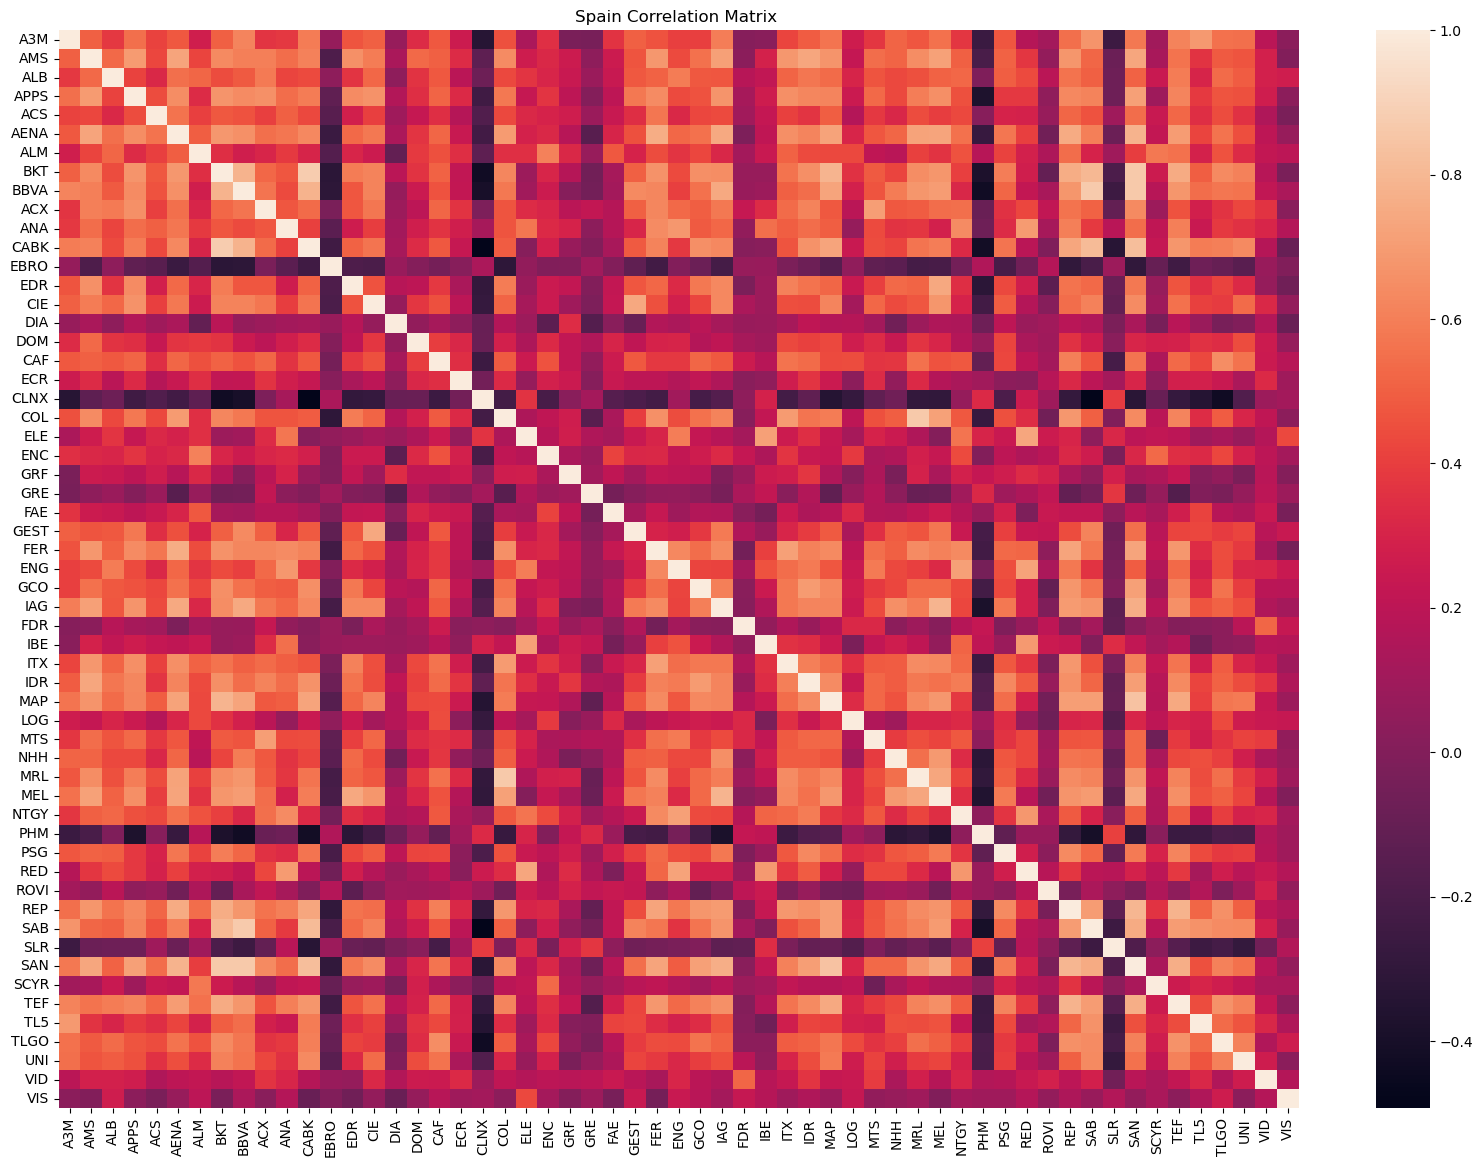

In [406]:
plt.figure(figsize=(20, 14))
sns.heatmap(cor_matrix, annot=False)
plt.title("Spain Correlation Matrix ")
plt.show()

In [407]:
#extracts the indices from the correlation matrix, which are the stocks
corInd_matrix = stocks_spain.iloc[:,1:].corr()
stocks = corInd_matrix.index.values
stocks

array(['A3M', 'AMS', 'ALB', 'APPS', 'ACS', 'AENA', 'ALM', 'BKT', 'BBVA',
       'ACX', 'ANA', 'CABK', 'EBRO', 'EDR', 'CIE', 'DIA', 'DOM', 'CAF',
       'ECR', 'CLNX', 'COL', 'ELE', 'ENC', 'GRF', 'GRE', 'FAE', 'GEST',
       'FER', 'ENG', 'GCO', 'IAG', 'FDR', 'IBE', 'ITX', 'IDR', 'MAP',
       'LOG', 'MTS', 'NHH', 'MRL', 'MEL', 'NTGY', 'PHM', 'PSG', 'RED',
       'ROVI', 'REP', 'SAB', 'SLR', 'SAN', 'SCYR', 'TEF', 'TL5', 'TLGO',
       'UNI', 'VID', 'VIS'], dtype=object)

In [408]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)
print(cor_matrix)

[[1.         0.50221934 0.37824794 ... 0.54530498 0.19373138 0.02877213]
 [0.50221934 1.         0.53194898 ... 0.46701848 0.28381875 0.00206025]
 [0.37824794 0.53194898 1.         ... 0.48885074 0.28386461 0.27034463]
 ...
 [0.54530498 0.46701848 0.48885074 ... 1.         0.26202003 0.02699647]
 [0.19373138 0.28381875 0.28386461 ... 0.26202003 1.         0.17082402]
 [0.02877213 0.00206025 0.27034463 ... 0.02699647 0.17082402 1.        ]]


In [409]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_array(cor_matrix)

#relabels the nodes to match the stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

In [410]:
G.nodes

NodeView(('A3M', 'AMS', 'ALB', 'APPS', 'ACS', 'AENA', 'ALM', 'BKT', 'BBVA', 'ACX', 'ANA', 'CABK', 'EBRO', 'EDR', 'CIE', 'DIA', 'DOM', 'CAF', 'ECR', 'CLNX', 'COL', 'ELE', 'ENC', 'GRF', 'GRE', 'FAE', 'GEST', 'FER', 'ENG', 'GCO', 'IAG', 'FDR', 'IBE', 'ITX', 'IDR', 'MAP', 'LOG', 'MTS', 'NHH', 'MRL', 'MEL', 'NTGY', 'PHM', 'PSG', 'RED', 'ROVI', 'REP', 'SAB', 'SLR', 'SAN', 'SCYR', 'TEF', 'TL5', 'TLGO', 'UNI', 'VID', 'VIS'))

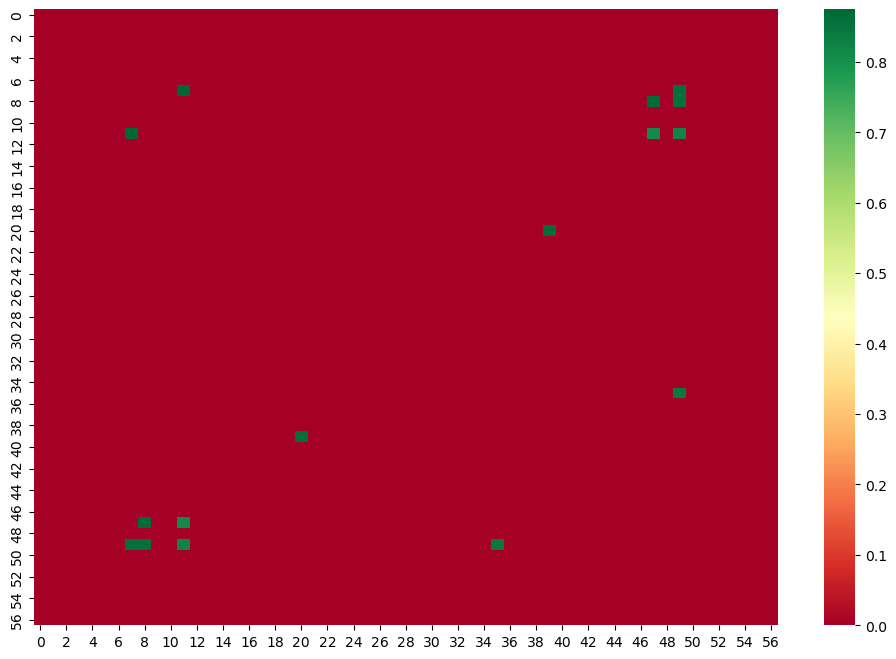

In [451]:
umbral = 0.8

#build new matrix
matrix_new = np.array(cor_matrix)  
#use np.where as filter with the below conditions
positive_corr = np.where(((matrix_new > umbral) & (matrix_new < 1.0)), matrix_new, 0)
negative_corr = np.where(matrix_new < 0, matrix_new, 0)

plt.figure(figsize=(12, 8))
sns.heatmap(positive_corr, annot=False, cmap='RdYlGn')
plt.show()

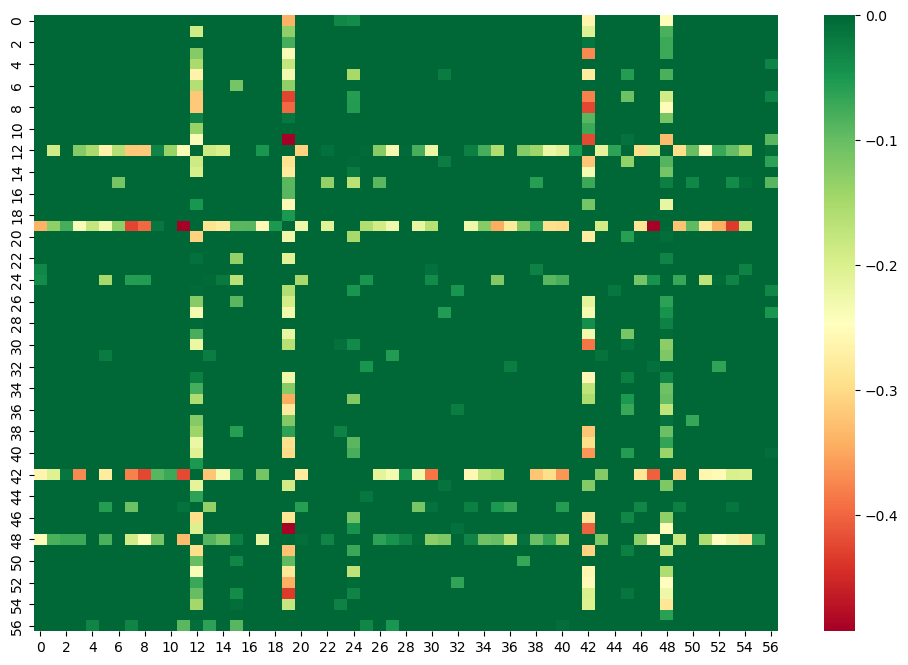

In [452]:
plt.figure(figsize=(12, 8))
sns.heatmap(negative_corr, annot=False, cmap='RdYlGn')
plt.show()

In [453]:
import math

# vfunc permite obtener la distancia a partir de las correlaciones 

distance = lambda c:  math.sqrt(2*(1-c))
vfunc = np.vectorize(distance)
distances = vfunc(positive_corr)
print(distances)

# Filtramos para representar solo aquellas distancias inferiores a min_distance
max_distance = math.sqrt(2*(1-umbral))
print(f'max_distance = {max_distance}')
positive_dist = np.where((distances < max_distance), distances, 0)
print(positive_dist)

[[1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 ...
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]]
max_distance = 0.6324555320336758
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [454]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G_positive = nx.from_numpy_array(positive_dist)

#relabels the nodes to match the  stocks names
G_positive = nx.relabel_nodes(G_positive,lambda x: stocks[x])

In [455]:
G_positive.adj

AdjacencyView({'A3M': {}, 'AMS': {}, 'ALB': {}, 'APPS': {}, 'ACS': {}, 'AENA': {}, 'ALM': {}, 'BKT': {'CABK': {'weight': 0.5006272816555318}, 'SAN': {'weight': 0.5277307431926271}}, 'BBVA': {'SAB': {'weight': 0.5144557592539505}, 'SAN': {'weight': 0.5290399503284379}}, 'ACX': {}, 'ANA': {}, 'CABK': {'BKT': {'weight': 0.5006272816555318}, 'SAB': {'weight': 0.6163607987427183}, 'SAN': {'weight': 0.5953176346495758}}, 'EBRO': {}, 'EDR': {}, 'CIE': {}, 'DIA': {}, 'DOM': {}, 'CAF': {}, 'ECR': {}, 'CLNX': {}, 'COL': {'MRL': {'weight': 0.5228902020151484}}, 'ELE': {}, 'ENC': {}, 'GRF': {}, 'GRE': {}, 'FAE': {}, 'GEST': {}, 'FER': {}, 'ENG': {}, 'GCO': {}, 'IAG': {}, 'FDR': {}, 'IBE': {}, 'ITX': {}, 'IDR': {}, 'MAP': {'SAN': {'weight': 0.5642178437132226}}, 'LOG': {}, 'MTS': {}, 'NHH': {}, 'MRL': {'COL': {'weight': 0.5228902020151484}}, 'MEL': {}, 'NTGY': {}, 'PHM': {}, 'PSG': {}, 'RED': {}, 'ROVI': {}, 'REP': {}, 'SAB': {'BBVA': {'weight': 0.5144557592539505}, 'CABK': {'weight': 0.61636079874

In [456]:
# get a list of nodes with no edges
isolates = list(nx.isolates(G_positive))

# remove the isolated nodes from the graph
G_positive.remove_nodes_from(isolates)

In [457]:
# Compute the sum of weights for each node
node_weights = {}
for node in G_positive.nodes():
    node_weights[node] = sum([edge[2]['weight'] for edge in G_positive.edges(node, data=True)])

# Normalize the sum of weights for each node
total_weight = sum(node_weights.values())
for node in node_weights:
    node_weights[node] /= total_weight

# Set the size of each node proportional to its normalized sum of weights
node_sizes = [node_weights[node]*30000 for node in G_positive.nodes()]

# Adjust the layout
pos = nx.kamada_kawai_layout(G_positive)





In [458]:
from pandas.core.arrays.categorical import CategoricalAccessor
# Define the categories of each node
tickers = pd.read_excel(f'{path}data/tickers.xlsx')

# Discard columns that are not necessary
tickers = tickers.loc[:,'Simbolo':'Sector']
tickers['Simbolo'] = tickers['Simbolo'].str.slice(stop=-3)
#print(tickers)

# Create a dictionary where each row represents a key-value pair
ticker_category = dict(zip(tickers['Simbolo'], tickers['Sector']))
print(f'Ticker category: {ticker_category}')

# Get a list of all possible values of the values of the dictionary
node_categories = list(set(ticker_category.values()))
print(f'Node categories: {node_categories}')

# Define a color map for each category
category_colors = {'Petrol and Power': 'red', 'Technology and Telecommunications': 'blue', 'Financial Services':'brown', 'Consumer Goods':'green', 'Consumer Services':'yellow', 'Real Estate Services':'grey', 'Basic Mat., Industry and Construction':'orange'}

# Create a list of colors for each node
node_colors = [category_colors[ticker_category[n]] for n in G_positive.nodes()]


Ticker category: {'A3M': 'Consumer Services', 'ACS': 'Basic Mat., Industry and Construction', 'ACX': 'Basic Mat., Industry and Construction', 'AENA': 'Consumer Services', 'ALB': 'Financial Services', 'ALM': 'Consumer Goods', 'AMS': 'Technology and Telecommunications', 'ANA': 'Basic Mat., Industry and Construction', 'APPS': 'Basic Mat., Industry and Construction', 'BBVA': 'Financial Services', 'BKT': 'Financial Services', 'CABK': 'Financial Services', 'CAF': 'Basic Mat., Industry and Construction', 'CIE': 'Basic Mat., Industry and Construction', 'CLNX': 'Technology and Telecommunications', 'COL': 'Real Estate Services', 'DIA': 'Consumer Services', 'DOM': 'Technology and Telecommunications', 'EBRO': 'Consumer Goods', 'ECR': 'Basic Mat., Industry and Construction', 'EDR': 'Consumer Services', 'ELE': 'Petrol and Power', 'ENC': 'Consumer Goods', 'ENG': 'Petrol and Power', 'FAE': 'Consumer Goods', 'FDR': 'Basic Mat., Industry and Construction', 'FER': 'Basic Mat., Industry and Construction',

In [459]:
#Revisar por que las que no pinto aristas no tienen color #################

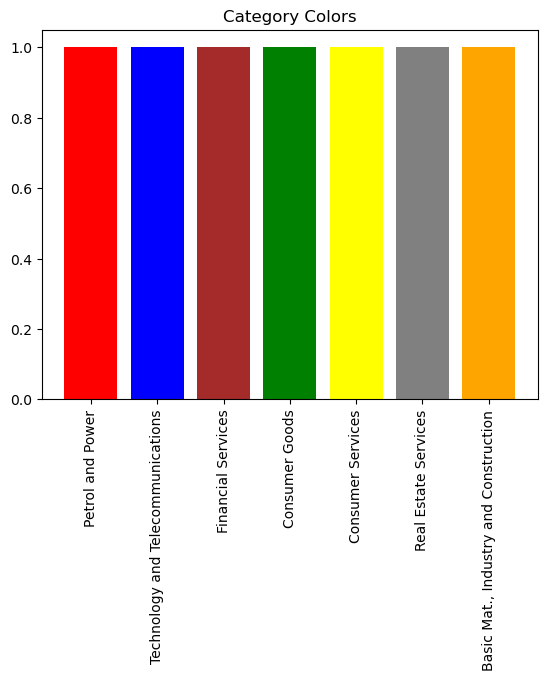

In [460]:
# Create a list of the categories and colors
categories = list(category_colors.keys())
colors = list(category_colors.values())

# Create a bar plot with a rectangle for each color
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.bar(i, 1, color=colors[i])

# Set the tick labels and title
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=90)
ax.set_title('Category Colors')

# Show the plot
plt.show()

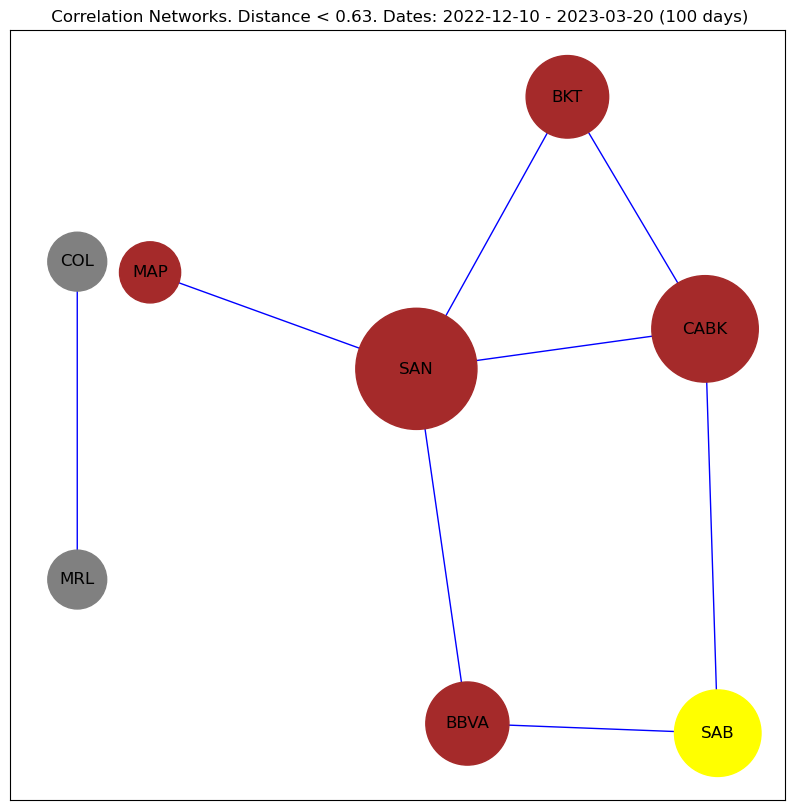

In [461]:
plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(G_positive, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G_positive, pos, edge_color = 'blue')
nx.draw_networkx_labels(G_positive, pos)
plt.title(f" Correlation Networks. Distance < {round(max_distance,2)}. Dates: {str(start_date)[:-9]} - {str(finish_date)[:-9]} ({time} days)")
plt.show()

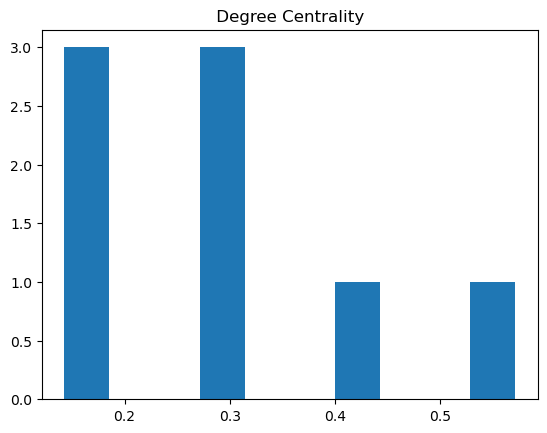

In [462]:
degree_centrality = nx.degree_centrality(G_positive)
plt.figure()
plt.hist(list(degree_centrality.values()))
plt.title(" Degree Centrality ")
plt.show()

In [463]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()



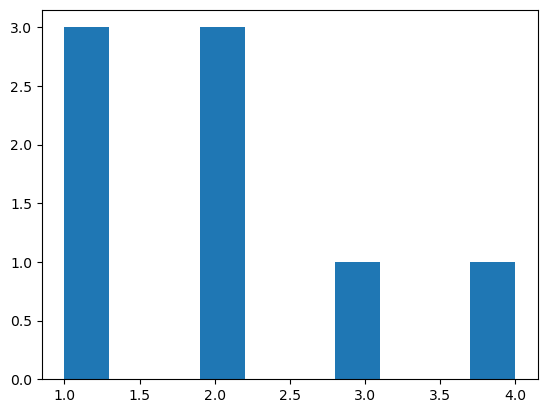

In [464]:
plot_degree_dist(G_positive)

In [465]:
#Density of Graph

nx.density(G_positive)

0.2857142857142857

In [466]:
#Transitivity of Graph

nx.transitivity(G_positive)

0.25

Study evolution of correlation between companies over time

In [467]:
time = 100
dates = stocks_spain['Date'][time:]

correlation_list = []
for date in dates:
    stocks_filter_2, start_date, finish_date = DateFilter (time, finish_date_str = date)

    # Calculate returns
    logreturn = np.log(stocks_filter_2.iloc[:,1:]).diff()
    logreturn = logreturn.iloc[1: , :]
    
    #craetes a correlation matrix
    corr_matrix = logreturn.corr()
    
    # Calculate the sum of all correlation coefficients, excluding the diagonal
    sum_corr = sum(corr_matrix.values.flatten()) - len(corr_matrix)

    # Calculate the total number of correlation coefficients, excluding the diagonal
    n_corr = len(corr_matrix)*(len(corr_matrix)-1)

    # Calculate the mean correlation
    mean_corr = sum_corr/n_corr

    #print(f"On date '{date}' the mean correlation between all companies is: {mean_corr}")
    correlation_list.append(mean_corr)


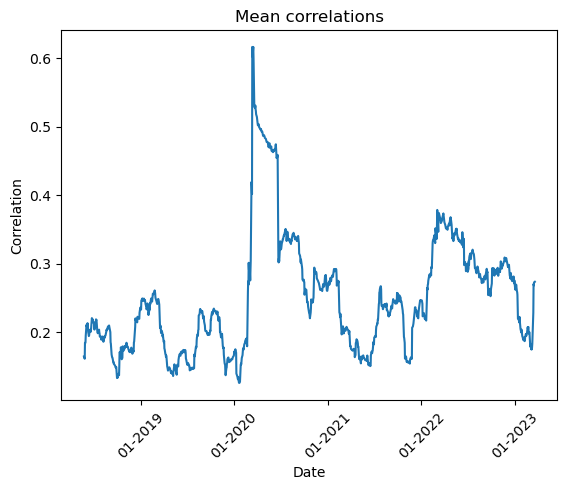

In [468]:
# Plot the mean correlation over time

fi, ax = plt.subplots()
ax.plot(dates, correlation_list)

date_locator = AutoDateLocator()
date_formatter = DateFormatter('%m-%Y')
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_tick_params(rotation=45)

# Set the plot title
ax.set_title('Mean correlations')
ax.set_xlabel('Date')
ax.set_ylabel('Correlation')

plt.show()

In [469]:
print(finish_date)

2023-03-20 00:00:00


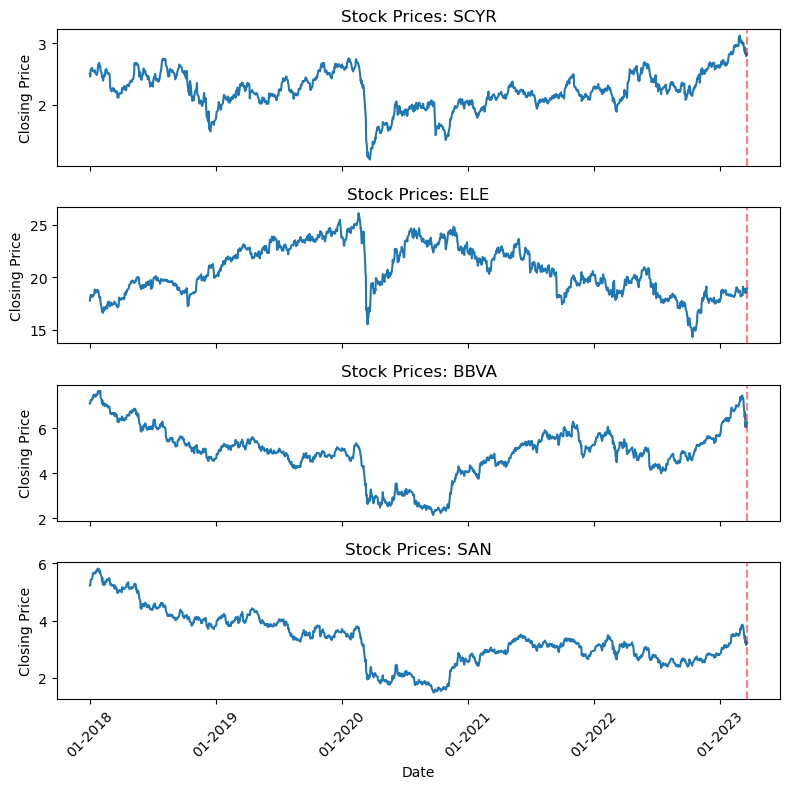

In [470]:
import datetime as dt
import matplotlib.pyplot as plt

# set the date to plot the vertical bar
red_line_date = finish_date

# Plotting the 3 companies with more correlation
#companies = ['SAN', 'BBVA', 'CABK']
companies = ['SCYR', 'ELE', 'BBVA', 'SAN']
dates = stocks_spain['Date']

# create a figure with subplots for each company
fig, axs = plt.subplots(nrows=len(companies), ncols=1, figsize=(8, 8), sharex=True)

# iterate over the companies and create a subplot for each one
for i, company in enumerate(companies):
    # select the prices for the current company
    prices = stocks_spain[company]
    
    # plot the prices on the current subplot
    axs[i].plot(dates, prices)
    
    # set the x-axis tick labels and rotation
    axs[i].xaxis.set_major_locator(date_locator)
    axs[i].xaxis.set_major_formatter(date_formatter)
    axs[i].xaxis.set_tick_params(rotation=45)

    # plot the vertical red line at the specified date
    axs[i].axvline(x=red_line_date, color='r', linestyle='--', alpha=0.5)
    
    # set the subplot title and axis labels
    axs[i].set_title(f'Stock Prices: {company}')
    axs[i].set_ylabel('Closing Price')

# set the x-axis label on the bottom subplot
axs[-1].set_xlabel('Date')

# adjust the subplots to prevent overlapping labels
fig.tight_layout()

# show the plot
plt.show()
